In [1]:
import uproot

In [3]:
#rtfile = uproot.open("data/mWPilot/ZJToMuMu_mWPilot_TuneCP5_13TeV-powheg-MiNNLO-pythia8-photos_NanoGen_1.root")
#df = rtfile["Events"].pandas.df(["LHEPart*","genWeight","LHEScaleWeightAltSet1"], flatten=False)

In [36]:
import glob
import pandas
files = glob.glob("data/mWPilotGridFix/*.root")
rtfile = uproot.open(files[0])
df = rtfile["Events"].pandas.df(["LHEPart*","genWeight",], flatten=False)
for f in files[1:]:
    rtfile = uproot.open(f)
    dftemp = rtfile["Events"].pandas.df(["LHEPart*","genWeight",], flatten=False)
    df = df.append(dftemp)

In [37]:
len(df)

2943000

In [38]:
nominalw = float(df["genWeight"].mode())

In [39]:
df.head(3)

,LHEPart_pt,LHEPart_eta,LHEPart_phi,LHEPart_mass,LHEPart_pdgId,genWeight
entry,,,,,,
0,"[28.576408, 55.031025, 17.12866, 18.015347]","[2.7157776, 1.6848351, 1.8709344, 2.1884584]","[-2.7127552, 0.19793463, 2.4347506, -2.5489168]","[0.10560641, 0.105770014, 0.0007959142, -0.000...","[13, -13, 1, 21]",2373.399902
1,"[32.609756, 38.869774, 5.832831, 4.8592772]","[1.6367687, 0.24235557, 2.9841864, 2.811315]","[1.4238499, -1.6265993, 1.1984111, 2.9094598]","[0.105700515, 0.10570018, 0.0002539506, 0.0003...","[13, -13, 21, 21]",2373.399902
2,"[31.167429, 30.767624, 5.6424055, 0.6706498]","[2.838397, 4.5682783, 1.4536098, -0.55410147]","[2.2554677, -1.0875514, 0.57152754, 0.07353865]","[0.10582919, 0.10836334, 0.0002729694, 1.87435...","[13, -13, 21, 2]",2373.399902


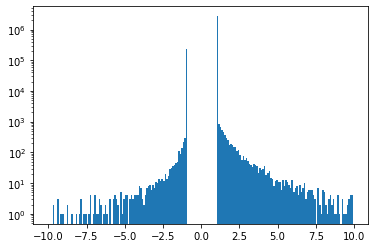

In [52]:
import matplotlib.pyplot as plt
import matplotlib
hist = plt.hist(df["genWeight"]/nominalw, bins=[-10+0.1*i for i in range(200)])
plt.yscale('log')
plt.show()

In [41]:
import matplotlib.pyplot as plt

In [42]:
from uproot_methods import TLorentzVector

In [43]:
df["mu1idx"] = df.apply(lambda x: 0 if x["LHEPart_pt"][0] > x["LHEPart_pt"][1] else 1, axis=1)
df["mu2idx"] = df.apply(lambda x: 1 if x["LHEPart_pt"][0] > x["LHEPart_pt"][1] else 0, axis=1)

In [44]:
df["mu1"] = df.apply(lambda x: TLorentzVector.from_ptetaphim(x["LHEPart_pt"][x["mu1idx"]], x["LHEPart_eta"][x["mu1idx"]], x["LHEPart_phi"][x["mu1idx"]], x["LHEPart_mass"][x["mu1idx"]]), axis=1)
df["mu2"] = df.apply(lambda x: TLorentzVector.from_ptetaphim(x["LHEPart_pt"][x["mu2idx"]], x["LHEPart_eta"][x["mu2idx"]], x["LHEPart_phi"][x["mu2idx"]], x["LHEPart_mass"][x["mu2idx"]]), axis=1)

In [45]:
df["pZ"] = df["mu1"] + df["mu2"]

In [46]:
df["yZ"] = df.apply(lambda x: x["pZ"].rapidity, axis=1)
df["ptZ"] = df.apply(lambda x: x["pZ"].pt, axis=1)
df["ptmu1"] = df.apply(lambda x: x["mu1"].pt, axis=1)
df["etamu1"] = df.apply(lambda x: x["mu1"].eta, axis=1)
df["ptmu2"] = df.apply(lambda x: x["mu2"].pt, axis=1)
df["etamu2"] = df.apply(lambda x: x["mu2"].eta, axis=1)

In [47]:
df["NormAbsGenWeight"] = abs(df["genWeight"])/nominalw

In [48]:
df_filtnom = df[(abs(df["genWeight"])-nominalw)/nominalw < 0.01].copy(deep=True)

In [53]:
df_filt = df[(abs(df["genWeight"])-nominalw)/nominalw > 0.01].copy(deep=True)
df_filt.head()

,LHEPart_pt,LHEPart_eta,LHEPart_phi,LHEPart_mass,LHEPart_pdgId,genWeight,mu1idx,mu2idx,mu1,mu2,pZ,yZ,ptZ,ptmu1,etamu1,ptmu2,etamu2,NormAbsGenWeight
entry,,,,,,,,,,,,,,,,,,
1185,"[16.309834, 20.382647, 3.6358836, 1.136397]","[-2.1943095, 0.8956499, -1.3153206, 1.1400385]","[-0.51707476, 2.754688, 0.1664603, -0.20443194]","[0.10569771, 0.10570099, -2.8092194e-05, -5.06...","[13, -13, -2, 21]",7477.959961,1,0,"TLorentzVector(20.383, 0.89565, 2.7547, 0.1057)","TLorentzVector(16.31, -2.1943, -0.51707, 0.1057)","TLorentzVector(-4.6984, -0.37174, -51.476, 103...",-0.547643,4.713042,20.382647,0.895650,16.309834,-2.194309,3.150737
1557,"[26.176998, 25.810335, 1.9437743, 1.5333327]","[4.8905506, 4.488953, -6.072761, 0.35949606]","[-2.9606783, 0.14485277, 0.46345448, 3.0662484]","[0.11948072, 0.107281595, -0.0031499146, -3.93...","[13, -13, 21, 1]",4964.649902,0,1,"TLorentzVector(26.177, 4.8906, -2.9607, 0.11948)","TLorentzVector(25.81, 4.489, 0.14485, 0.10728)","TLorentzVector(-0.20975, -0.98436, 2889.8, 289...",4.691140,1.006463,26.176998,4.890551,25.810335,4.488953,2.091788
1822,"[16.461998, 9.218432, 6.079175, 9.94198]","[2.5917084, -0.49879268, 2.495728, 0.6064089]","[0.9686705, -1.0193894, 3.1275659, -2.518703]","[0.10575167, 0.10569985, 0.0006612851, -0.0002...","[13, -13, 21, -3]",3107.030029,0,1,"TLorentzVector(16.462, 2.5917, 0.96867, 0.10575)","TLorentzVector(9.2184, -0.49879, -1.0194, 0.1057)","TLorentzVector(14.153, 5.7147, 104.5, 120.91)",1.309898,15.263593,16.461998,2.591708,9.218432,-0.498793,1.309105
2046,"[32.404804, 32.66772, 1.5079243, 1.3731428]","[-4.3448935, -2.6404636, -0.97031707, -3.5627697]","[-0.33884633, 2.7259176, -2.3287687, -1.3053259]","[0.11207436, 0.10558824, 3.6080794e-05, 0.0005...","[13, -13, 21, 21]",6218.509766,1,0,"TLorentzVector(32.668, -2.6405, 2.7259, 0.10559)","TLorentzVector(32.405, -4.3449, -0.33885, 0.11...","TLorentzVector(0.67636, 2.4201, -1476.6, 1479.3)",-3.489876,2.512877,32.667721,-2.640464,32.404804,-4.344893,2.620085
2162,"[45.175365, 44.303482, 2.259761, 1.8634166]","[1.3348438, 1.0890875, 0.3228976, 2.0535295]","[0.5805546, -2.621145, -2.0514412, -0.41053042]","[0.10570791, 0.105696276, -4.5833414e-05, 2.14...","[13, -13, 21, 1]",4226.740234,0,1,"TLorentzVector(45.175, 1.3348, 0.58055, 0.10571)","TLorentzVector(44.303, 1.0891, -2.6211, 0.1057)","TLorentzVector(-0.66378, 2.7474, 138.25, 165.04)",1.213155,2.826455,45.175365,1.334844,44.303482,1.089087,1.780880


In [78]:
print("Non-unit weights are %0.4f percent of dataset" % float(len(df_filt)*100/len(df)))

Non-unit weights are 0.2782 percent of dataset


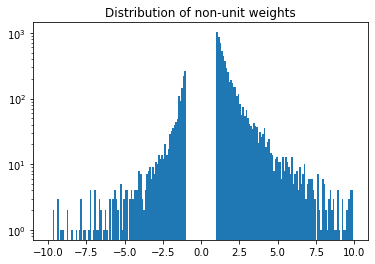

In [71]:
plt.hist(df_filt["genWeight"]/nominalw, bins=[-10+i*0.1 for i in range(0,200)])
plt.yscale('log')
plt.title("Distribution of non-unit weights")
plt.show()

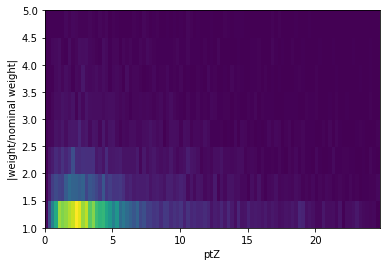

In [56]:
hist = plt.hist2d(df_filt["ptZ"], df_filt["NormAbsGenWeight"], bins=([0.25*i for i in range(100)], [1+0.5*i for i in range(9)]))
plt.xlabel("ptZ")
plt.ylabel("|weight/nominal weight|")
plt.show()

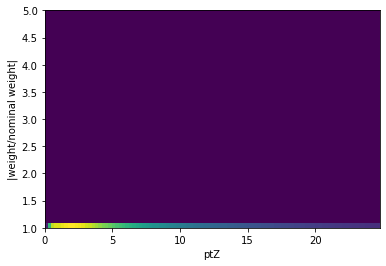

In [57]:
hist = plt.hist2d(df["ptZ"], df["NormAbsGenWeight"], bins=([0.25*i for i in range(100)], [1.0,1.1]+[1+0.5*i for i in range(1,9)]))
plt.xlabel("ptZ")
plt.ylabel("|weight/nominal weight|")
plt.show()

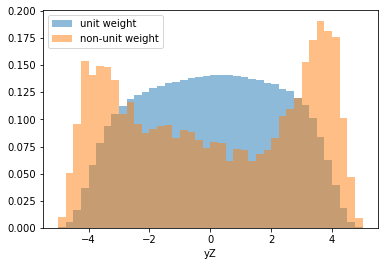

In [58]:
hist = plt.hist(df_filtnom["yZ"], bins=([-5+0.25*i for i in range(41)]), alpha=0.5, label="unit weight", density=True)
hist = plt.hist(df_filt["yZ"], bins=([-5+0.25*i for i in range(41)]), alpha=0.5, label="non-unit weight", density=True)
plt.legend()
plt.xlabel("yZ")
plt.show()

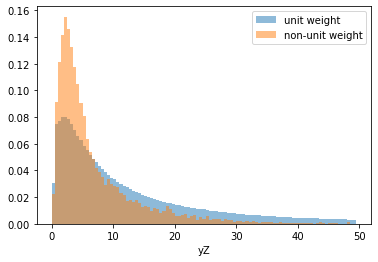

In [59]:
histnom = plt.hist(df_filtnom["ptZ"], bins=([0.5*i for i in range(100)]), density=True, alpha=0.5, label="unit weight")
histlarge = plt.hist(df_filt["ptZ"], bins=([0.5*i for i in range(100)]), density=True, alpha=0.5, label="non-unit weight")
plt.legend()
plt.xlabel("yZ")
plt.show()

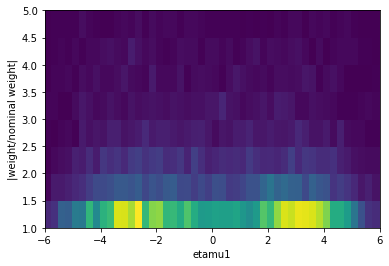

In [60]:
hist = plt.hist2d(df_filt["etamu1"], df_filt["NormAbsGenWeight"], bins=([-6+0.25*i for i in range(49)], [1+0.5*i for i in range(9)]))
plt.xlabel("etamu1")
plt.ylabel("|weight/nominal weight|")
plt.show()

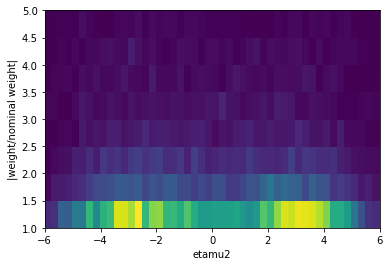

In [61]:
hist = plt.hist2d(df_filt["etamu1"], df_filt["NormAbsGenWeight"], bins=([-6+0.25*i for i in range(49)], [1+0.5*i for i in range(9)]))
plt.xlabel("etamu2")
plt.ylabel("|weight/nominal weight|")
plt.show()

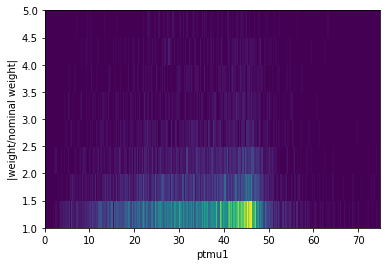

In [62]:
hist = plt.hist2d(df_filt["ptmu1"], df_filt["NormAbsGenWeight"], bins=([0.25*i for i in range(300)], [1+0.5*i for i in range(9)]))
plt.xlabel("ptmu1")
plt.ylabel("|weight/nominal weight|")
plt.show()

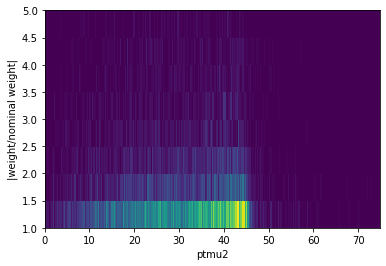

In [63]:
hist = plt.hist2d(df_filt["ptmu2"], df_filt["NormAbsGenWeight"], bins=([0.25*i for i in range(300)], [1+0.5*i for i in range(9)]))
plt.xlabel("ptmu2")
plt.ylabel("|weight/nominal weight|")
plt.show()

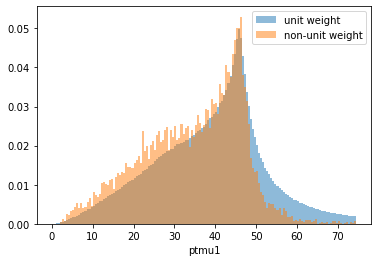

In [64]:
histnom = plt.hist(df_filtnom["ptmu1"], bins=([0.5*i for i in range(150)]), density=True, alpha=0.5, label="unit weight")
histlarge = plt.hist(df_filt["ptmu1"], bins=([0.5*i for i in range(150)]), density=True, alpha=0.5, label="non-unit weight")
plt.legend()
plt.xlabel("ptmu1")
plt.show()

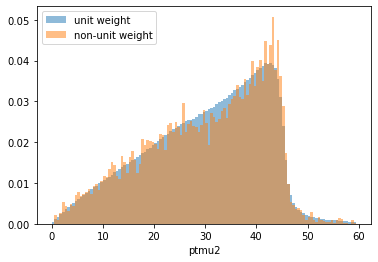

In [65]:
histnom = plt.hist(df_filtnom["ptmu2"], bins=([0.5*i for i in range(120)]), density=True, alpha=0.5, label="unit weight")
histlarge = plt.hist(df_filt["ptmu2"], bins=([0.5*i for i in range(120)]), density=True, alpha=0.5, label="non-unit weight")
plt.legend()
plt.xlabel("ptmu2")
plt.show()

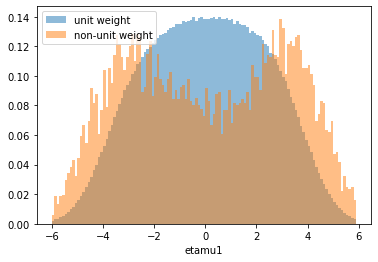

In [66]:
histnom = plt.hist(df_filtnom["etamu1"], bins=([-6+0.1*i for i in range(120)]), density=True, alpha=0.5, label="unit weight")
histlarge = plt.hist(df_filt["etamu1"], bins=([-6+0.1*i for i in range(120)]), density=True, alpha=0.5, label="non-unit weight")
plt.legend()
plt.xlabel("etamu1")
plt.show()

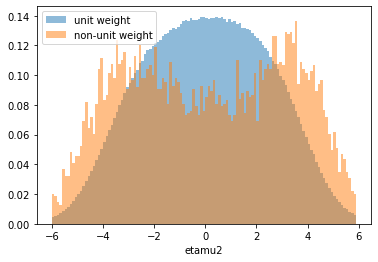

In [67]:
histnom = plt.hist(df_filtnom["etamu2"], bins=([-6+0.1*i for i in range(120)]), density=True, alpha=0.5, label="unit weight")
histlarge = plt.hist(df_filt["etamu2"], bins=([-6+0.1*i for i in range(120)]), density=True, alpha=0.5, label="non-unit weight")
plt.legend()
plt.xlabel("etamu2")
plt.show()

Text(0.5, 1.0, 'ptZ vs. yZ for unit weight events')

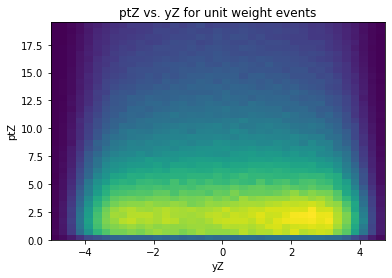

In [68]:
hist = plt.hist2d(df_filtnom["yZ"], df_filtnom["ptZ"], bins=([-5+0.25*i for i in range(40)], [i*0.5 for i in range(40)]))
plt.xlabel("yZ")
plt.ylabel("ptZ")
plt.title("ptZ vs. yZ for unit weight events")

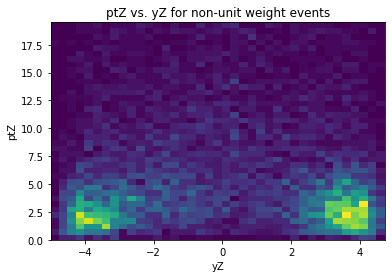

In [69]:
hist = plt.hist2d(df_filt["yZ"], df_filt["ptZ"], bins=([-5+0.25*i for i in range(40)], [i*0.5 for i in range(40)]))
plt.xlabel("yZ")
plt.ylabel("ptZ")
plt.title("ptZ vs. yZ for non-unit weight events")
plt.show()